In [ ]:
!wget --no-cache -O init.py -q https://raw.githubusercontent.com/acubillosunal/UBM-DEEP-LEARNING-1/main/init.py
import init; init.init(force_download=False);

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from skimage.io import imread
from scipy import signal
%matplotlib inline
tf.__version__

'2.15.0'

# **Imágenes como datos**

Podemos leer nuestras imáganes como datos y visualizarla de la siguiente manera.

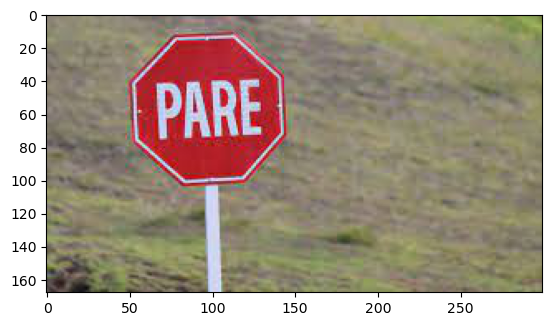

In [ ]:
import matplotlib.pyplot as plt

data = plt.imread('local/imgs/señal_pare.jpeg')
plt.imshow(data)
plt.show()

Veamos la forma de la imágen. Las primeras dos dimensiones corresponden al largo y ancho de la imágen (el número de pixeles), la uĺtima dimensión corresponde a los tres colores presentes en lal imágen, rojo, verde y azul que están presentes en cada pixel.

In [ ]:
data.shape

(168, 300, 3)

Podemos examinar el cpolor de la imágen en un pixel en particular indexando la dimensión

In [ ]:
data[100, 150]


array([135, 129, 105], dtype=uint8)

Pixel value at (100, 150): [115 101 100]


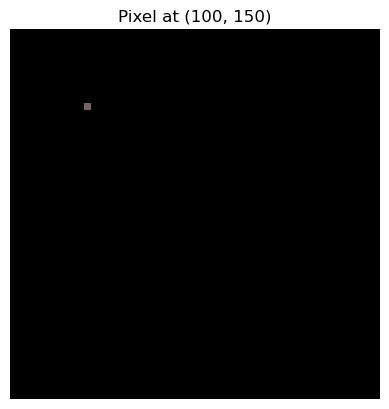

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Access the pixel value at (100, 150)
pixel_value = data[140, 15]

# Print the pixel value (shows a list with red, green, and blue channel values)
print(f"Pixel value at (100, 150): {pixel_value}")

# Create a small new image to represent the pixel (adjust size as needed)
pixel_image = np.zeros((50, 50, 3), dtype=np.uint8)  # Black image with size 50x50

# Set the pixel value of the new image (adjust size as needed)
pixel_image[10, 10] = pixel_value

# Display the pixel image
plt.imshow(pixel_image)
plt.title("Pixel at (100, 150)")
plt.axis('off')
plt.show()



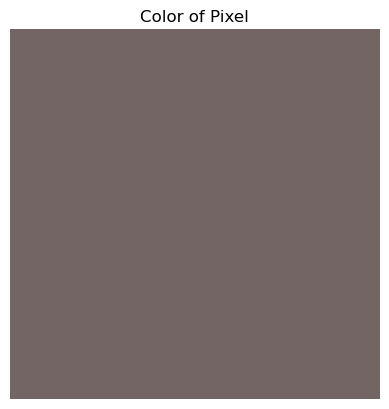

In [ ]:
import matplotlib.pyplot as plt

# Specify the pixel coordinates you want to visualize
pixel_x = 140
pixel_y = 15

# Extract the pixel value at the specified coordinates
pixel_value = data[pixel_x, pixel_y]

# Create a plot with a single pixel
plt.imshow([[pixel_value]])
plt.title('Color of Pixel')
plt.axis('off')  # Turn off axis
plt.show()


Podemos asignar diferentes tipos de colores a los pixeles de la imágen

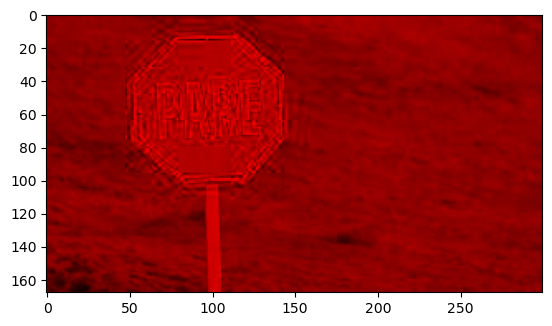

In [ ]:
data_new = data.copy()

data_new[:, :, 1] = 0
data_new[:, :, 2] = 0

plt.imshow(data_new)
plt.show()

Podemos tomar una parte de la imágen y que su intensidad de color cambie

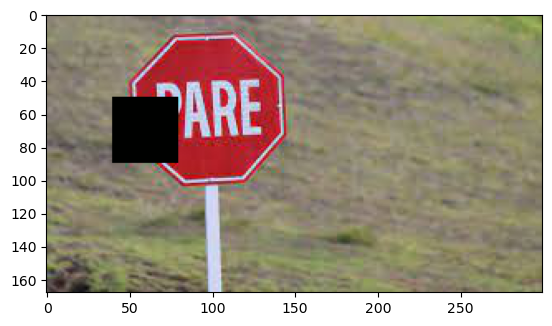

In [ ]:
data_new = data.copy()

data_new[50 : 90, 40 : 80, :] = [0,1,0]
plt.imshow(data_new)
plt.show()

# 4.2 - Convolutions


## Convoluciones de funciones

Una convolución es una operación matemática que recibe como **entrada dos funciones** y produce como **salida otra función**.

La intuición es que una función de entrada **barre** la segunda función de entrada y se multiplican en el camino.

Ver [Wikipedia:Convolution](https://en.wikipedia.org/wiki/Convolution)

$$(f*g)(t) = \int_{-\infty}^\infty f(t)g(t-\tau)d\tau$$

In [ ]:
f = lambda x: ((x>1) & (x<2)).astype(int)
g = lambda x: ((x>1) & (x<2)).astype(int)

x = np.linspace(-1,4,1000)
c = np.convolve(f(x),g(x), "same")
#c = c/np.max(c)

(3, 3)
(3, 3)
(9,)


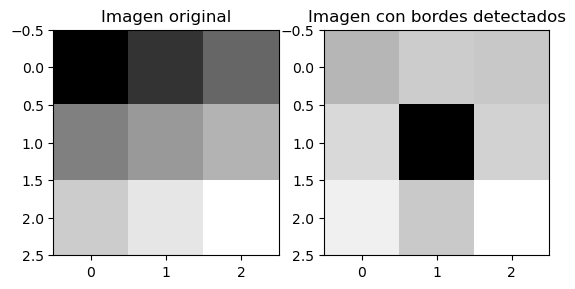

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

filtro_sobel_x = np.array([[-1, 0, 1],
                           [-2, 0, 2],
                           [-1, 0, 1]])

filtro_sobel_y = np.array([[-1, -2, -1],
                           [0, 0, 0],
                           [1, 2, 1]])

print(filtro_sobel_x.shape)  # Should print (3, 3)
print(filtro_sobel_y.shape)  # Should print (3, 3)

imagen = np.array([[100, 120, 140],
                   [150, 160, 170],
                   [180, 190, 200]])

imagen_flat = imagen.flatten()
print(imagen_flat.shape)  # Should print (9,) for a 3x3 image

from scipy.signal import convolve2d

borde_x = convolve2d(imagen_flat.reshape(imagen.shape), filtro_sobel_x, mode='same')
borde_y = convolve2d(imagen_flat.reshape(imagen.shape), filtro_sobel_y, mode='same')


# Rest of the code for reshaping and visualization (optional)


# Reshape back to 2D for visualization (optional)
borde_x_2d = borde_x.reshape(imagen.shape)
borde_y_2d = borde_y.reshape(imagen.shape)

magnitud_borde = np.sqrt(borde_x_2d**2 + borde_y_2d**2)

# Visualization (optional)
plt.subplot(121), plt.imshow(imagen, cmap='gray')
plt.title('Imagen original')
plt.subplot(122), plt.imshow(magnitud_borde, cmap='gray')
plt.title('Imagen con bordes detectados')
plt.show()


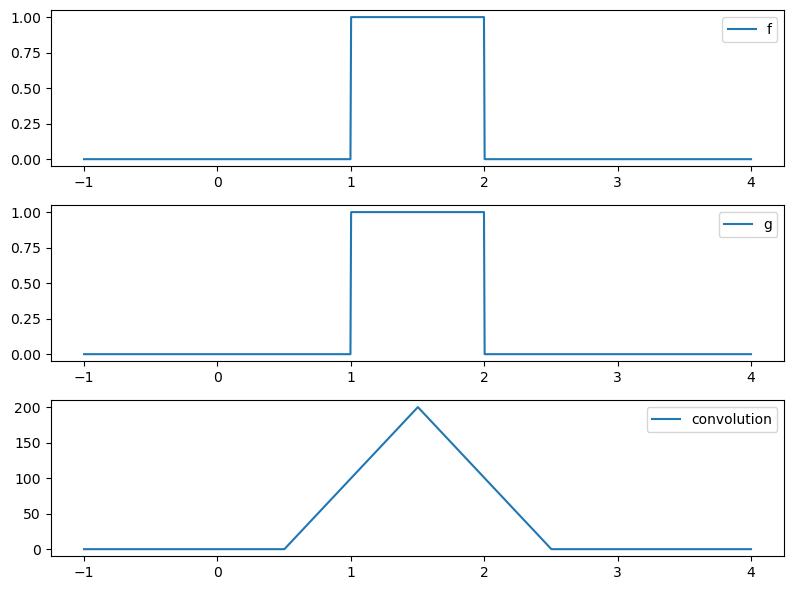

In [ ]:
plt.figure(figsize=(8,6))
plt.subplot(311); plt.plot(x,f(x), label="f"); plt.legend()
plt.subplot(312); plt.plot(x,g(x), label="g"); plt.legend()
plt.subplot(313); plt.plot(x,c, label="convolution"); plt.legend()
plt.tight_layout()

## La convolución es solo multiplicación y suma.

En un entorno discreto, la integración se convierte en suma.

$$(f*g)[t] = \sum_{i=-\infty}^{+\infty} f[t]g[t-i]$$


In [ ]:
a = np.r_[0,0,1,1,1,0,0]
b = np.r_[0,0,1,1,1,0,0]
np.convolve(a,b)

array([0, 0, 0, 0, 1, 2, 3, 2, 1, 0, 0, 0, 0])

observar que cada paso de convolución es solo una multiplicación elemento por elemento de vectores y una suma de los elementos resultantes.

In [ ]:
for i in range(len(a)*2-1):
    pa, pb = (a[:i+1], b[-i-1:]) if i < len(a) else (a[i-len(a)+1:], b[:-(i-len(a))-1])
    print ((pa*pb).sum(), "=", pa, "*", pb)

0 = [0] * [0]
0 = [0 0] * [0 0]
0 = [0 0 1] * [1 0 0]
0 = [0 0 1 1] * [1 1 0 0]
1 = [0 0 1 1 1] * [1 1 1 0 0]
2 = [0 0 1 1 1 0] * [0 1 1 1 0 0]
3 = [0 0 1 1 1 0 0] * [0 0 1 1 1 0 0]
2 = [0 1 1 1 0 0] * [0 0 1 1 1 0]
1 = [1 1 1 0 0] * [0 0 1 1 1]
0 = [1 1 0 0] * [0 0 1 1]
0 = [1 0 0] * [0 0 1]
0 = [0 0] * [0 0]
0 = [0] * [0]


el argumento `mode` para convolucionar regula el `padding`

In [ ]:
np.convolve(a,b, mode="same")

array([0, 1, 2, 3, 2, 1, 0])

Por supuesto, las funciones pueden tener cualquier valor y no necesariamente ser iguales, y asumimos que hay un relleno de ceros infinito en ambos argumentos, por lo que **no tienen que ser del mismo tamaño**.

En este caso:

- `a` se considera la **señal fuente**
- `b` se considera el **filtro**

In [ ]:
a = np.r_[0,0,1,1,1,0,0]
b = np.r_[1,0,1]
np.convolve(a,b)

array([0, 0, 1, 1, 2, 1, 1, 0, 0])

## Convolución con imágenes

Simplemente está barriendo en ambas direcciones.

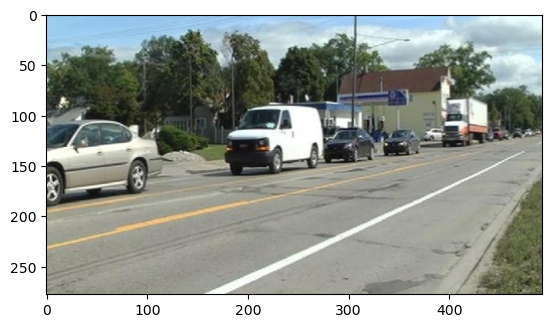

In [ ]:
img = imread("local/imgs/cars-driving.jpg")
plt.imshow(img)

In [ ]:
img = imread("local/imgs/cars-driving.jpg").mean(axis=2)
img = (img-np.min(img))/(np.max(img)-np.min(img)) # normalize to 0,1
img.shape, np.min(img), np.max(img)

((278, 493), 0.0, 1.0)

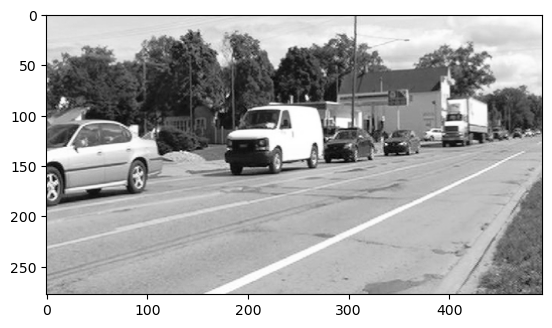

In [ ]:
plt.imshow(img, cmap=plt.cm.Greys_r)

una conv 2D es simplemente la misma multiplicación y suma elemento por elemento.

In [ ]:
f1 = np.r_[[[-1,-1], [1,1]]]
print (f1)
c1 = signal.convolve2d(img, f1, mode="valid")

[[-1 -1]
 [ 1  1]]


doing manually the first pixel of the resulting img

In [ ]:
c1[0,1], (img[:2,:2]*f1).sum()

(0.002645502645502562, -0.002645502645502562)

and this filter has a border detection effect.

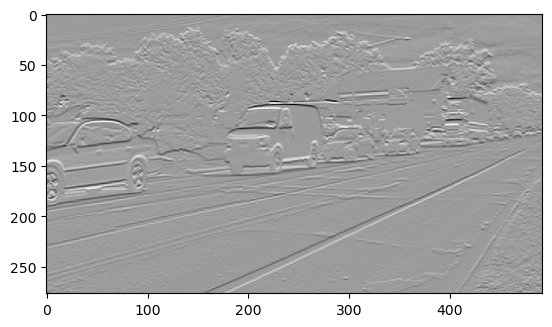

In [ ]:
plt.imshow(c1, cmap=plt.cm.Greys_r)

Usamos `abs` para convertir todas las diferencias en positivas, ya que no nos importa la *dirección* de los bordes.

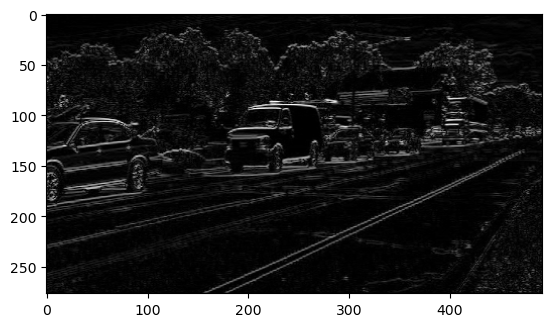

In [ ]:
plt.imshow(np.abs(c1), cmap=plt.cm.Greys_r)

y un filtro para la detección de bordes verticales

[[ 1 -1]
 [ 1 -1]]


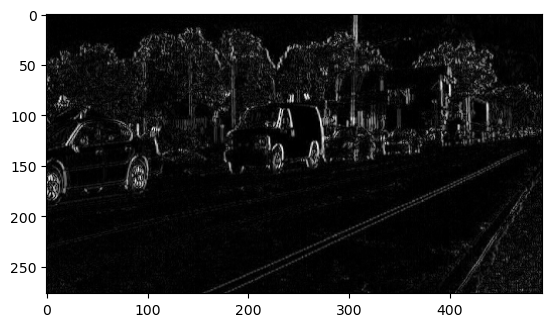

In [ ]:
f2 = np.r_[[[1,-1], [1,-1]]]
print(f2)
c2 = signal.convolve2d(img, f2, mode="valid")
plt.imshow(np.abs(c2), cmap=plt.cm.Greys_r)

combinando las dos salidas

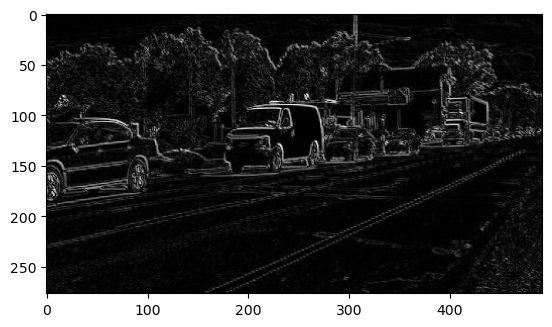

In [ ]:
plt.imshow(np.abs(c1+c2), cmap=plt.cm.Greys_r)

un filtro borroso

[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]


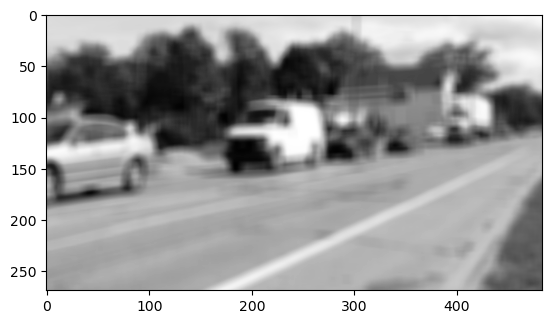

In [ ]:
f = np.ones((10,10))
print(f)
c = signal.convolve2d(img, f, mode="valid")
plt.imshow(np.abs(c), cmap=plt.cm.Greys_r)

## En Tensorflow de la misma manera

TF generalmente espera una variedad de imágenes de forma

    (n_imgs, pixels_width, pixels_height, n_channels)

In [ ]:
# reshape image
img = imread("local/imgs/cars-driving.jpg").mean(axis=2)
img = (img-np.min(img))/(np.max(img)-np.min(img)) # normalize to 0,1
img = img.reshape(1,*img.shape,1)
img.shape

(1, 278, 493, 1)

queremos un filtro de tamaño `2x2`

In [ ]:
c = tf.keras.layers.Conv2D(filters=1, kernel_size=2, activation="linear", padding="same")
c.build(input_shape=(img.shape))

In [ ]:
for w in c.weights:
    print (w)

<tf.Variable 'kernel:0' shape=(2, 2, 1, 1) dtype=float32, numpy=
array([[[[0.41750818]],

        [[0.05715829]]],


       [[[0.6995607 ]],

        [[0.57488376]]]], dtype=float32)>
<tf.Variable 'bias:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>


establecer manualmente los valores del filtro

In [ ]:
c.set_weights([ np.r_[[[-1,-1], [1,1]]].reshape(2,2,1,1), np.r_[0]])

In [ ]:
cimg = c(img)
cimg.shape

TensorShape([1, 278, 493, 1])

In [ ]:
cimg[0,0,0]

<tf.Tensor: shape=(1,), dtype=float32, numpy=array([-0.00264549], dtype=float32)>

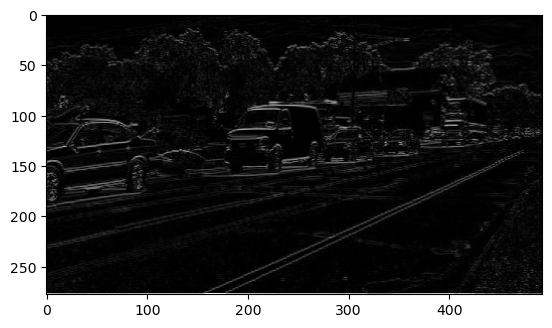

In [ ]:
plt.imshow(np.abs(cimg.numpy()[0,:,:,0]), cmap=plt.cm.Greys_r)

In [ ]:
cimg[0,0,0]

<tf.Tensor: shape=(1,), dtype=float32, numpy=array([-0.00264549], dtype=float32)>

In [ ]:
(img[0,:2,:2,0]*np.r_[[[-1,-1], [1,1]]]).sum()

-0.002645502645502562

las activaciones simplemente se aplican a la salida. Observe cómo una activación `relu` con un filtro de detección de bordes horizontal detecta bordes en **una dirección**

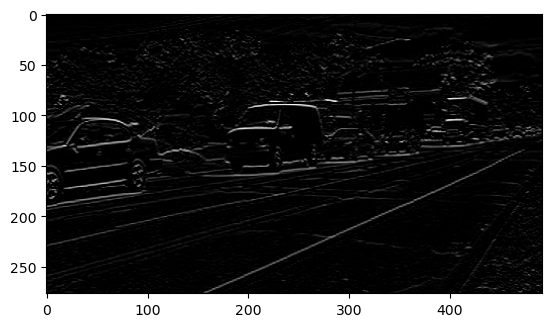

In [ ]:
c = tf.keras.layers.Conv2D(filters=1, kernel_size=2, activation="relu", padding="valid")
c.build(input_shape=(img.shape))
c.set_weights([ np.r_[[[-1,-1], [1,1]]].reshape(2,2,1,1), np.r_[0]])
plt.imshow(c(img).numpy()[0,:,:,0], cmap=plt.cm.Greys_r)

o en la otra dirección invirtiendo el filtro

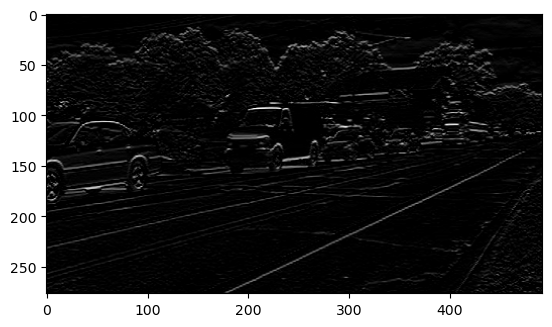

In [ ]:
c = tf.keras.layers.Conv2D(filters=1, kernel_size=2, activation="relu", padding="valid")
c.build(input_shape=(img.shape))
c.set_weights([ np.r_[[[1,1], [-1,-1]]].reshape(2,2,1,1), np.r_[0]])
plt.imshow(c(img).numpy()[0,:,:,0], cmap=plt.cm.Greys_r)

para imágenes en color, los filtros también deben tener tres canales

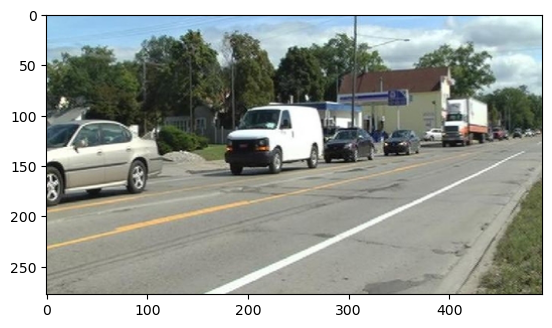

In [ ]:
img = imread("local/imgs/cars-driving.jpg")
img = (img-np.min(img))/(np.max(img)-np.min(img)) # normalize to 0,1
img = img.reshape(1, *img.shape)
plt.imshow(img[0])


In [ ]:
f = -np.ones((3,3,3))*1.5
f[:,:,0] = 1.5
f

array([[[ 1.5, -1.5, -1.5],
        [ 1.5, -1.5, -1.5],
        [ 1.5, -1.5, -1.5]],

       [[ 1.5, -1.5, -1.5],
        [ 1.5, -1.5, -1.5],
        [ 1.5, -1.5, -1.5]],

       [[ 1.5, -1.5, -1.5],
        [ 1.5, -1.5, -1.5],
        [ 1.5, -1.5, -1.5]]])

In [ ]:
c = tf.keras.layers.Conv2D(filters=1, kernel_size=3, activation="sigmoid", padding="valid")
c.build(input_shape=(img.shape))
c.set_weights([ f.reshape(3,3,3,1), np.r_[0]])

In [ ]:
cimg = c(img).numpy()
cimg.shape

(1, 276, 491, 1)

observe cómo se detecta el rojo **muy puro** (el filtro hecho a mano es difícil de sintonizar)

(-0.5, 490.5, 275.5, -0.5)

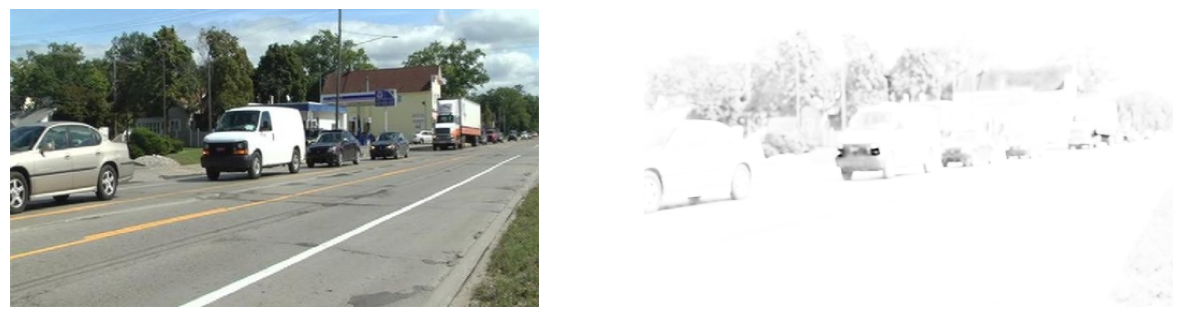

In [ ]:
plt.figure(figsize=(15,10))
plt.subplot(121); plt.imshow(img[0,:,:]); plt.axis("off")
plt.subplot(122); plt.imshow(cimg[0,:,:,0], cmap=plt.cm.Greys); plt.axis("off")

Detectar verde (muy poco)

(-0.5, 490.5, 275.5, -0.5)

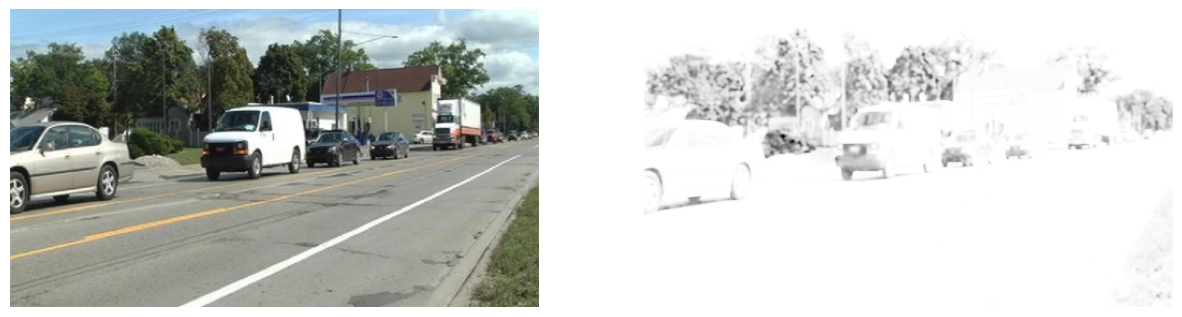

In [ ]:
f = -np.ones((3,3,3))*1.5
f[:,:,1] = 1.5
c.set_weights([ f.reshape(3,3,3,1), np.r_[0]])
plt.figure(figsize=(15,10))
cimg = c(img).numpy()

plt.subplot(121); plt.imshow(img[0,:,:]); plt.axis("off")
plt.subplot(122); plt.imshow(cimg[0,:,:,0], cmap=plt.cm.Greys); plt.axis("off")

detecta azul (pequeña tolerancia)

(-0.5, 490.5, 275.5, -0.5)

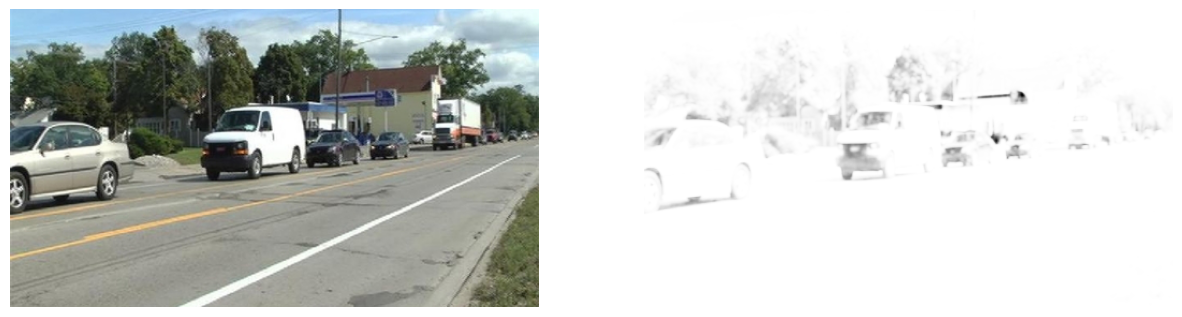

In [ ]:
f = -np.ones((3,3,3))*1.5
f[:,:,2] = 1.5
c.set_weights([ f.reshape(3,3,3,1), np.r_[0]])
plt.figure(figsize=(15,10))
cimg = c(img).numpy()

plt.subplot(121); plt.imshow(img[0,:,:]); plt.axis("off")
plt.subplot(122); plt.imshow(cimg[0,:,:,0], cmap=plt.cm.Greys); plt.axis("off")